![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Prevendo a Perda de Clientes - Case VIVO</font>

![](https://img.ibxk.com.br/2015/11/23/23152245732256.jpg?w=1120&h=420&mode=crop&scale=both)


![](https://media1.giphy.com/media/8Am0UlfiwZcgEDOy4h/giphy.gif)
![](https://img.ibxk.com.br/2020/05/12/gif1-12161338217395.gif)

#**Por que** os clientes deixam uma empresa e **como** uma empresa pode **evitar a perda de clientes**?

* A rotatividade ou perda de clientes (Churn) ocorre quando um cliente para de fazer negócios com uma empresa. 
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSbUeVGaIlQXolaWuI2pG3SbDcRn-hhY07Jng&usqp=CAU)

* É um problema considerável, especialmente em setores dependentes de assinatura, como telecomunicações, aplicativos de recorrência e Streaming de Video (Netflix, Spotfy, PlayStore). 
![](https://blog.opinionbox.com/wp-content/uploads/2019/09/marcas-streaming-de-video.png)

### Por que isso é importante, Eduardo?


* A rotatividade de clientes afeta diretamente a **receita**. 

* Também pode aumentar os **custos**, pois é mais caro adquirir novos clientes do que manter os existentes.

![](https://www.jornalcontabil.com.br/wp-content/uploads/2020/06/businessman-analyzing-company-financial-report-balance-with-digital-augmented-reality-graphics_34141-379.jpg)



#1° Qual o Problema de Negócio?

Nesse Ciência dos Dados na Prática, nosso objetivo é ajudar a VIVO a determinar os **principais fatores de rotatividade** de clientes e **prever as chances de um cliente sair**, para que a VIVO tome ações apropriadas para evitar essa Perda de Clientes.

# 2° Análise Exploratória dos Dados

In [2]:
# Set-up libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve


In [2]:
# Versões dos pacotes usados neste jupyter notebook
!pip install -q -U watermark
%reload_ext watermark
%watermark -a "Ciência dos Dados" --iversions

# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

#Alertas
import warnings
import sys
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")



pandas  1.1.5
seaborn 0.11.1
numpy   1.19.5
Ciência dos Dados
Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.6.9


### Fonte de Dados

Fonte: https://www.kaggle.com/blastchar/telco-customer-churn

Cada linha representa um cliente, cada coluna contém os atributos do clientes

**O conjunto de dados inclui informações sobre:**

1. Clientes que saíram no último mês - a coluna é chamada de Churn

2. Serviços que cada cliente assinou - telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes

3. Informações da conta do cliente - há quanto tempo ele é cliente, contrato, método de pagamento, faturamento sem papel, cobranças mensais e cobranças totais
Informações demográficas sobre clientes - sexo, faixa etária e se eles têm parceiros e dependentes.

![](https://cienciadosdados.com/images/2021/VIVO-CHURN/1.png)
![](https://cienciadosdados.com/images/2021/VIVO-CHURN/2.png)
![](https://cienciadosdados.com/images/2021/VIVO-CHURN/3.png)
![](https://cienciadosdados.com/images/2021/VIVO-CHURN/4.png)
![](https://cienciadosdados.com/images/2021/VIVO-CHURN/5.png)
![](https://cienciadosdados.com/images/2021/VIVO-CHURN/6.png)
![](https://cienciadosdados.com/images/2021/VIVO-CHURN/7.png)
![](https://cienciadosdados.com/images/2021/VIVO-CHURN/8.png)
![](https://cienciadosdados.com/images/2021/VIVO-CHURN/9.png)


In [3]:
#Importação e Visualização dos Dados
df = pd.read_csv('VIVO_CHURN.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check for missing values
df.duplicated().sum()

0

In [5]:
# Check for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

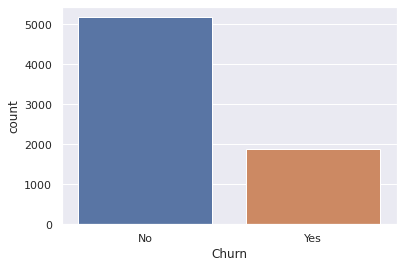

In [7]:
# Explore label breakdown
df['Churn'].value_counts()
sns.countplot(df['Churn'])

/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

<AxesSubplot:xlabel='Dependents', ylabel='count'>

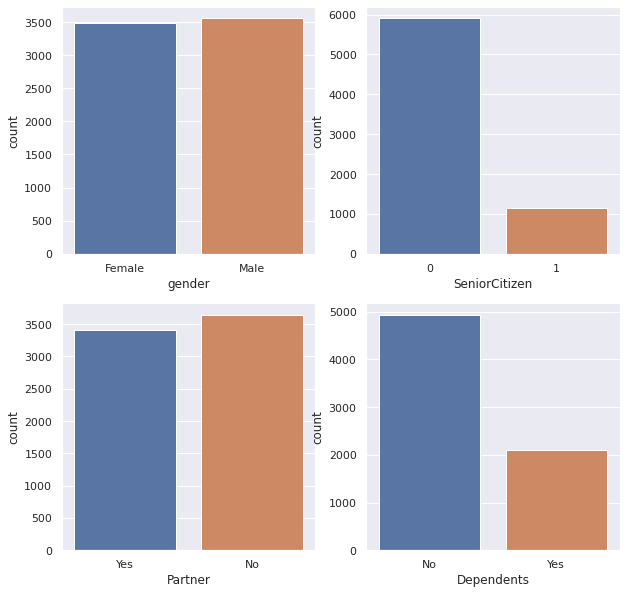

In [8]:
# Explore demographic features quickly
f, ax = plt.subplots(2,2, figsize=(10,10))

sns.countplot(df['gender'], ax=ax[0,0])
sns.countplot(df['SeniorCitizen'], ax=ax[0,1])
sns.countplot(df['Partner'], ax=ax[1,0])
sns.countplot(df['Dependents'], ax=ax[1,1])

/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

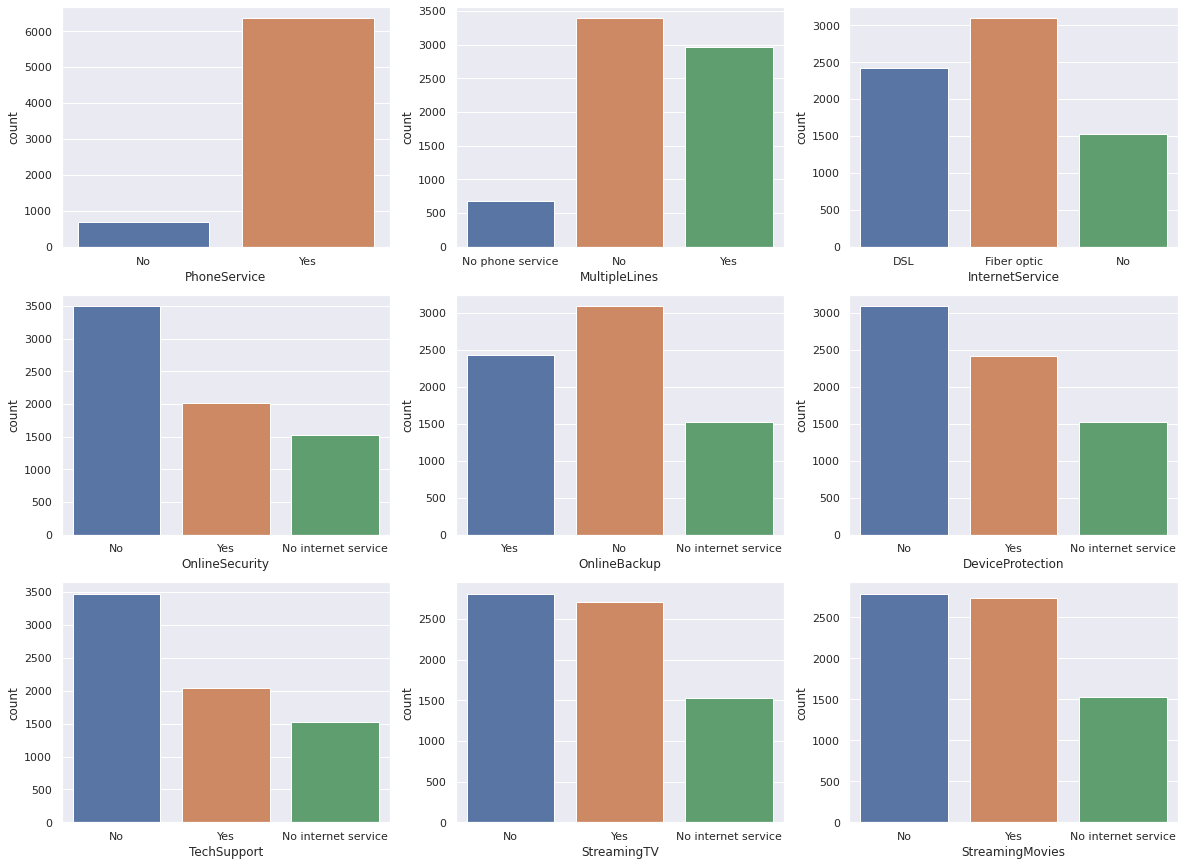

In [9]:
# Explore services subscribed to quickly
f, ax = plt.subplots(3,3, figsize=(20,15))

sns.countplot(df['PhoneService'], ax=ax[0,0])
sns.countplot(df['MultipleLines'], ax=ax[0,1])
sns.countplot(df['InternetService'], ax=ax[0,2])
sns.countplot(df['OnlineSecurity'], ax=ax[1,0])
sns.countplot(df['OnlineBackup'], ax=ax[1,1])
sns.countplot(df['DeviceProtection'], ax=ax[1,2])
sns.countplot(df['TechSupport'], ax=ax[2,0])
sns.countplot(df['StreamingTV'], ax=ax[2,1])
sns.countplot(df['StreamingMovies'], ax=ax[2,2])

/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

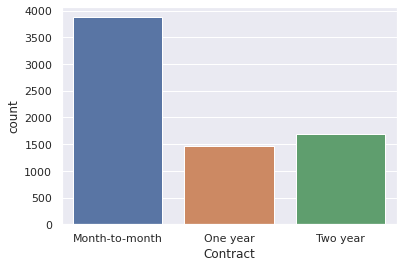

In [10]:
# Explore accounts quickly
df['Contract'].value_counts()
sns.countplot(df['Contract'])

/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

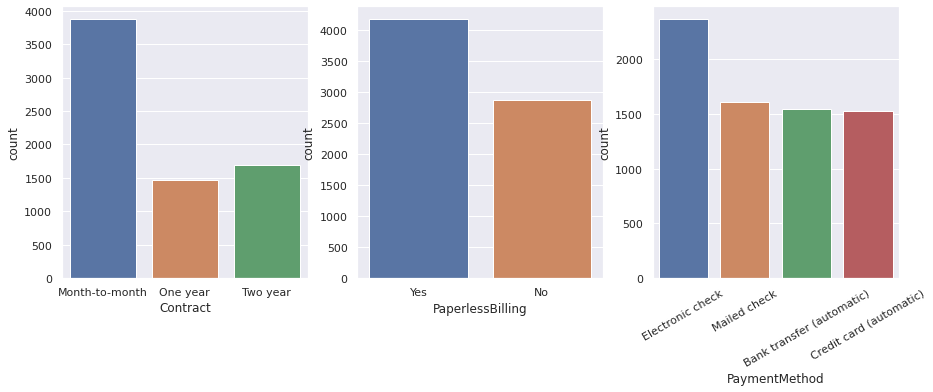

In [11]:
# Explore accounts quickly
f, ax = plt.subplots(1,3, figsize=(15,5))
plt.xticks(rotation=30)

sns.countplot(df['Contract'], ax=ax[0])
sns.countplot(df['PaperlessBilling'], ax=ax[1])
sns.countplot(df['PaymentMethod'], ax=ax[2])

/home/nico/miniconda3/envs/vivoc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

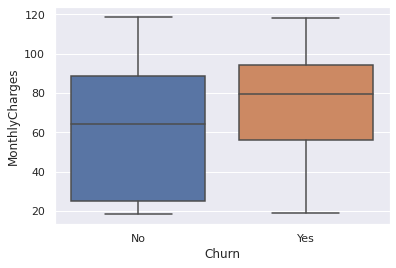

In [12]:

# Explore monthly payments against churns
sns.boxplot('Churn', 'MonthlyCharges', data=df)

In [13]:

# Summarise
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#3° Pré-Processamento dos Dados

In [14]:
# Remove unuseable features
df.drop(['customerID'], axis=1, inplace=True)

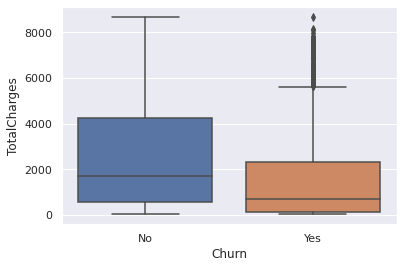

In [15]:
# Convert amounts of type string to numeric
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df.isna().sum()
df.dropna(inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Explore total charges against churns
sns.boxplot('Churn', 'TotalCharges', data=df)

In [13]:

# Convert labels from Yes/No to 1/0 for Churn
df['Churn'].replace('Yes', 1, inplace=True)
df['Churn'].replace('No', 0, inplace=True)

# Convert labels from 1/0 to Yes/No for SeniorCitizen
df['SeniorCitizen'].replace(1, 'Yes', inplace=True)
df['SeniorCitizen'].replace(0, 'No', inplace=True)

# Encode other variables
df_onehot = pd.get_dummies(df)

df_onehot.head()

,tenure,MonthlyCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,1,29.85,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45,42.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


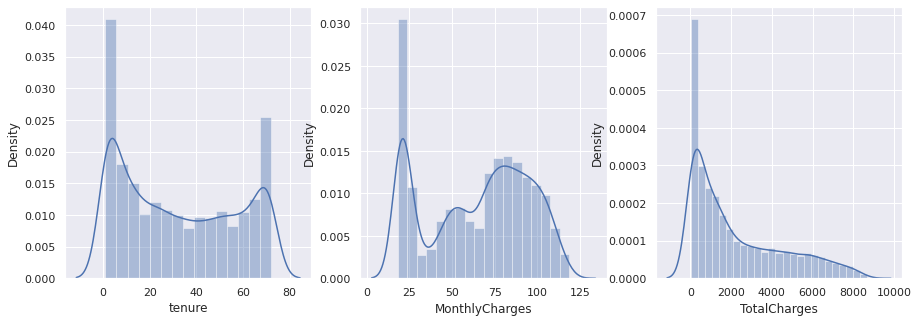

In [17]:

# Visualise distribution before
f, ax = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df_onehot['tenure'], ax=ax[0])
sns.distplot(df_onehot['MonthlyCharges'], ax=ax[1])
sns.distplot(df_onehot['TotalCharges'], ax=ax[2])

In [18]:
# Scale
scaler = MinMaxScaler()
df_onehot['tenure'] = scaler.fit_transform(df_onehot['tenure'].values.reshape(-1, 1))
df_onehot['MonthlyCharges'] = scaler.fit_transform(df_onehot['MonthlyCharges'].values.reshape(-1, 1))
df_onehot['TotalCharges'] = scaler.fit_transform(df_onehot['TotalCharges'].values.reshape(-1, 1))

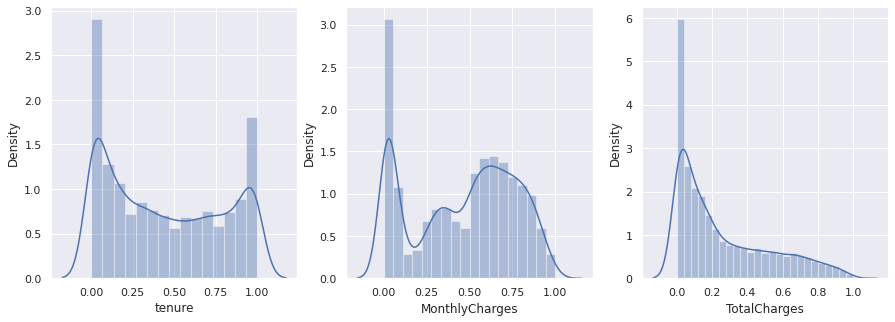

In [19]:
# Visualise distribution after
f, ax = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df_onehot['tenure'], ax=ax[0])
sns.distplot(df_onehot['MonthlyCharges'], ax=ax[1])
sns.distplot(df_onehot['TotalCharges'], ax=ax[2])

In [20]:
# Split dataset
X = df_onehot.drop(['Churn'], axis=1)
y = df_onehot['Churn'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#4° Construção de Máquinas Preditivas

### Baseline

In [38]:
# Build and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Apply model
y_predict = model.predict(X_test)
actual_vs_predict = pd.DataFrame({'Actual': y_test.flatten(),
                                 'Prediction': y_predict.flatten()})
print(actual_vs_predict.sample(12))



      Actual  Prediction
1171       1           1
95         0           0
946        1           0
1215       0           0
718        1           1
1101       1           0
1181       1           1
1168       0           0
514        0           0
845        0           0
304        0           0
1016       0           0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#5° Avaliação da Máquina Preditiva baseline

ROC AUC: 70.77 %


Text(0, 0.5, 'True Positive Rate')

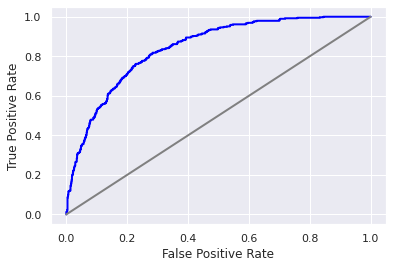

In [37]:
# Evaluate model
print('ROC AUC: %.2f' % (roc_auc_score(y_test,y_predict)*100), '%')

# Visualise ROC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, color='blue')
plt.plot([0,1], [0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Batendo o Baseline com GBM - Gradient Boosting 

In [27]:
# Build and train model
model = GradientBoostingClassifier (learning_rate=0.1,max_depth=2,n_estimators=200,max_features=8,random_state=42)
model.fit(X_train, y_train)

# Apply model
y_predict = model.predict(X_test)
actual_vs_predict = pd.DataFrame({'Actual': y_test.flatten(),
                                 'Prediction': y_predict.flatten()})
print(actual_vs_predict.sample(12))



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Actual  Prediction
6          0           1
921        1           0
1289       1           1
1041       1           1
358        0           0
458        1           0
933        0           0
1239       0           0
800        0           0
729        1           1
130        0           0
716        0           0


ROC AUC: 71.64 %


Text(0, 0.5, 'True Positive Rate')

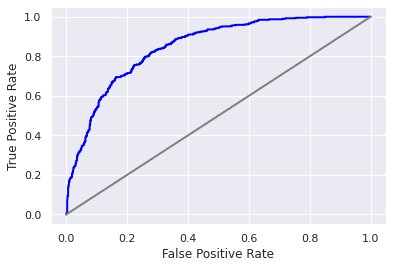

In [28]:
# Evaluate model
print('ROC AUC: %.2f' % (roc_auc_score(y_test,y_predict)*100), '%')

# Visualise ROC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, color='blue')
plt.plot([0,1], [0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Batendo o Baseline com XGBoost - eXtreme Gradient Boosting 

In [33]:
# Build and train model
model = XGBClassifier (max_depth=3, learning_rate=0.1, n_estimators=200)
model.fit(X_train, y_train)

# Apply model
y_predict = model.predict(X_test)
actual_vs_predict = pd.DataFrame({'Actual': y_test.flatten(),
                                 'Prediction': y_predict.flatten()})
print(actual_vs_predict.sample(12))



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Actual  Prediction
1276       1           1
964        0           0
429        0           0
18         1           1
1102       1           0
470        0           0
483        0           0
13         0           0
377        0           0
348        1           1
458        1           0
1190       0           0


ROC AUC: 70.77 %


Text(0, 0.5, 'True Positive Rate')

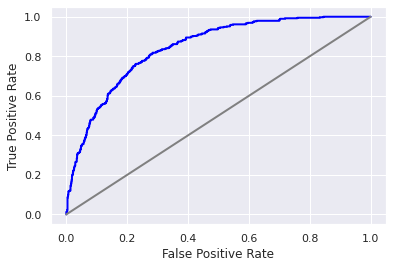

In [35]:
# Evaluate model
print('ROC AUC: %.2f' % (roc_auc_score(y_test,y_predict)*100), '%')

# Visualise ROC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, color='blue')
plt.plot([0,1], [0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Principais fatores de rotatividade

* Fomos capazes de prever a probabilidade de um cliente sair no próximo mês ou mais com ROC AUC de 72%, aproveitando os 7k + registros de clientes disponíveis. 

* Nosso modelo se saiu melhor do que uma estimativa aleatória de 50-50. Isso significa que podemos identificar clientes que estão prestes a sair, a uma taxa relativamente precisa, para intervenção.

* Descobrimos que há uma **relação positiva dos 10 recursos abaixo** com a rotatividade de clientes. 




#Clientes que tendem a sair
#### Isso indica que a probabilidade de rotatividade do cliente aumenta com os valores desses recursos. Em outras palavras, os clientes que tendem a sair também tendem a:

1. Têm altas cobranças totais
2. Ter um contrato mensal
3. Inscrito em um tipo de serviço de Internet de fibra óptica
4. Pagamento com cheque 
5. Não tem assinatura de techsupport
6. Não tem assinatura de segurança online
7. Ter assinatura de streaming de filmes
8. Ter faturamento sem papel
9. Ter assinatura de streaming de tv
10. São idosos


AxesSubplot(0.125,0.125;0.775x0.755)


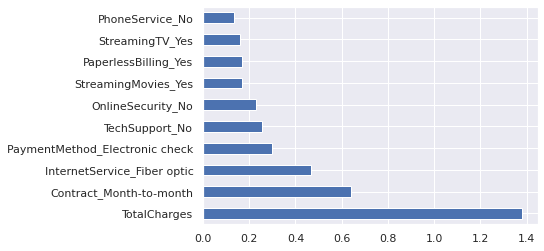

In [39]:
# Top ten features with positive relationship to churn
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False )[:10].plot(kind='barh'))

#Clientes que tendem a ficar - Os Fiéis
* Também descobrimos que há uma **relação negativa dos 10 recursos abaixo** com a rotatividade de clientes. 

* Isso indica que a probabilidade de rotatividade do cliente diminui com os valores desses recursos. Em outras palavras, os clientes **FIÉIS** também tendem a:

1. Está há muito tempo na empresa
2. Ter contratos de dois anos
3. Inscrito em um tipo DSL de serviço de Internet
4. Paga com pagamentos automatizados de cartão de crédito
5. Não tem várias linhas telefônicas
6. Não tem faturamento sem papel
7. Taxas mensais mais baixas
8. Não são idosos
9. Ter assinatura de suporte técnico
10. Ter assinatura de segurança online



AxesSubplot(0.125,0.125;0.775x0.755)


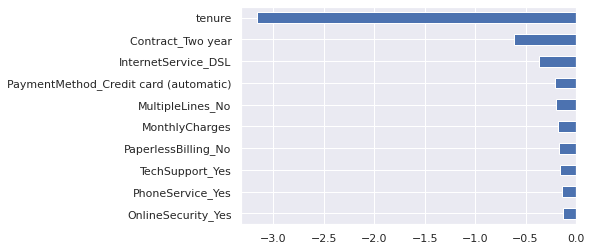

In [40]:
# Top ten features with negative relationship to churn
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh'))


# **Resumão**

* Neste projeto de Ciência de Dados, adotamos uma abordagem rápida e simples e vários algoritmos de Machine Learning para Construir a Máquina Preditiva e para determinar a probabilidade de saída dos clientes. 

* Em seguida, alavancamos a relação entre a probabilidade de rotatividade e os recursos para determinar possíveis fatores de rotatividade. 

* Além disso, o ROC AUC foi usado para avaliar o modelo porque ele fornece uma visão sobre a relação entre a taxa de verdadeiro positivo e a taxa de falso positivo, certas áreas de preocupação para nosso problema e propósitos.



#"A perda é inevitável nos negócios, mas pode ser mitigada"

Encontrar os principais motivadores e tomar medidas preventivas pode ajudar a reduzir a perda a um nível aceitável. A oportunidade dos resultados e as visões abrangentes do cliente são importantes. Para satisfazer a ambos, podemos implantar rapidamente uma Máquina Preditiva mais Simples e, em seguida, evoluí-la com o tempo.

![](https://thumbs.gfycat.com/GentleDisloyalEider-max-1mb.gif)


![](https://kvchamerano1library.files.wordpress.com/2020/05/hauling_arrow_up_graph_anim_md_wm_v2.gif)

Simbóra!

#Fim

## Valeu!

### #YouTube - Mais Aulas como essa no YouTube 
https://www.youtube.com/channel/UCd3ThZLzVDDnKSZMsbK0icg?sub_confirmation=1

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/O8SZGlSFnwo" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Fonte: https://github.com/jamiemorales/project-case-studies/blob/master/002-predict-customer-churn.ipynb